# Reading data into GeoPandas

## Review

Basic data structure in GeoPandas is a GeoDataFrame.

A GeoDataFrame is simply a regular Pandas data frame with the addition of a GeoSeries

A series in Pandas is analagous to a field in a database or a column in a table or an attribute in a feature dataset.

A GeoSeries is a special type of column that contains vector geometry.

The geometries are handled internally as Shapely object

## Reading from single layer files

GeoPandas uses Fiona under the hood to read geospatial data into GeoDataFrames

GeoPandas can also read directly from a PostGIS database

### Reading Shapefiles


In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
raptors = gpd.read_file("data/Raptor_Nests.shp")

View the GeoDataFrame as an attribute table

In [3]:
raptors.head(5)

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)


In [4]:
raptors.tail(10)

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
869,906.0,40.051193,-104.794308,2015-08-17,Red-tail Hawk,INACTIVE NEST,906,POINT (-104.76127 40.07742)
870,907.0,39.995541,-104.891149,2015-08-18,Red-tail Hawk,INACTIVE NEST,907,POINT (-104.81692 40.02965)
871,908.0,39.996516,-104.891649,2015-08-18,Red-tail Hawk,INACTIVE NEST,908,POINT (-104.93254 40.03877)
872,909.0,39.999138,-104.899116,2015-08-18,Swainsons Hawk,INACTIVE NEST,909,POINT (-104.91958 40.00116)
873,910.0,40.002516,-104.893713,2015-08-18,Red-tail Hawk,INACTIVE NEST,910,POINT (-104.83619 39.98674)
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297)
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975)
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432)
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443)
878,NaN,40.243865,-104.937170,None,RTHA,FLEDGED NEST,1002,POINT (-104.93717 40.24387)


View the GeoDataFrame as a map

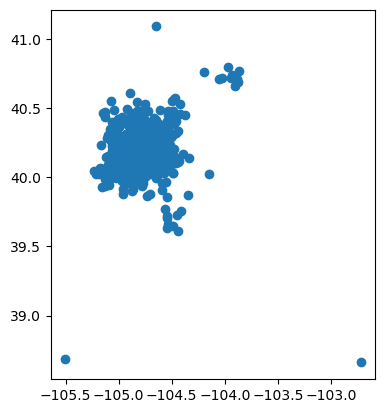

In [5]:
raptors.plot()
plt.show()

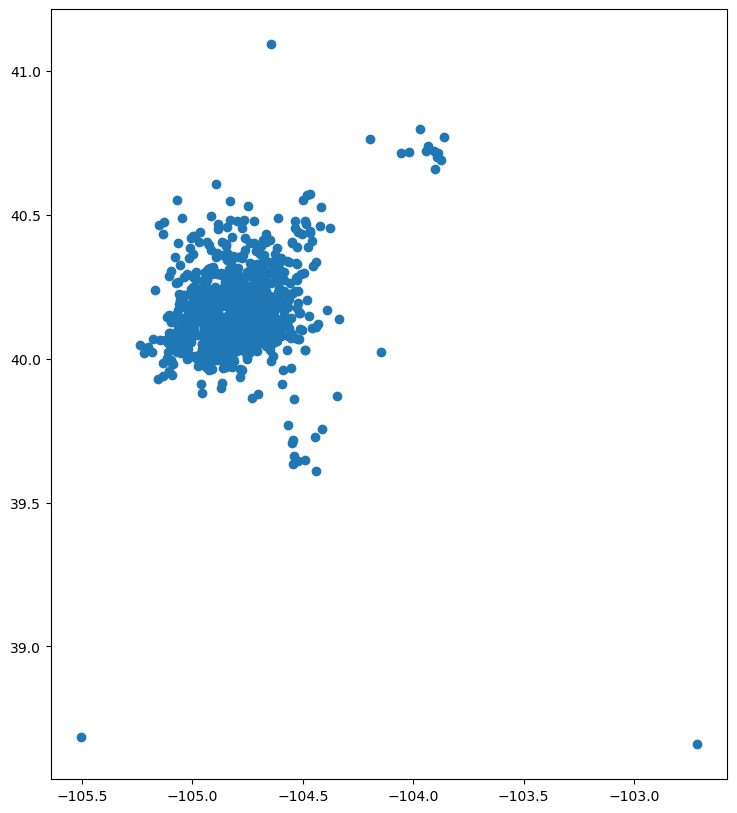

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))
raptors.plot(ax=ax)
plt.show()

View the map with colors determined by a column value

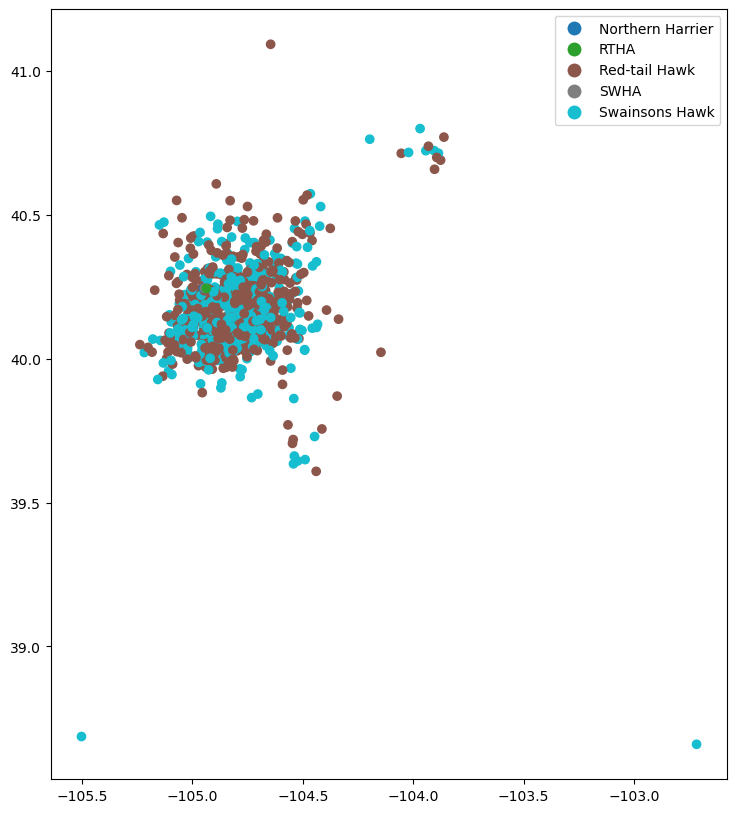

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
raptors.plot(ax = ax, column = "recentspec", legend=True)
plt.show()

Get basic information about a GeoDataFrame using the info method

Remember that GeoPandas is based on Pandas and Pandas uses NumPy behind the scenes and NumPy is written in C and uses C data types.

Because of this the Data Type (Dtype) column displays C data types and string and date types are viewed as objects in C.

In [12]:
raptors.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  876 non-null    float64 
 1   lat_y_dd    877 non-null    float64 
 2   long_x_dd   877 non-null    float64 
 3   lastsurvey  878 non-null    object  
 4   recentspec  879 non-null    object  
 5   recentstat  879 non-null    object  
 6   Nest_ID     879 non-null    int64   
 7   geometry    879 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 55.1+ KB


You can also get information about the GeoDataFrame's Coordinate Reference System

In [13]:
raptors.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can of course, view the same data in UTM Zone 13 CRS if we have that information available

In [14]:
raptors_utm = gpd.read_file("data/Raptor_UTM.shp")

In [15]:
raptors_utm.crs

<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

And if we plot it out it seems to be the same data, but the values in the X and Y axes are different because the coordinates are now in UTM

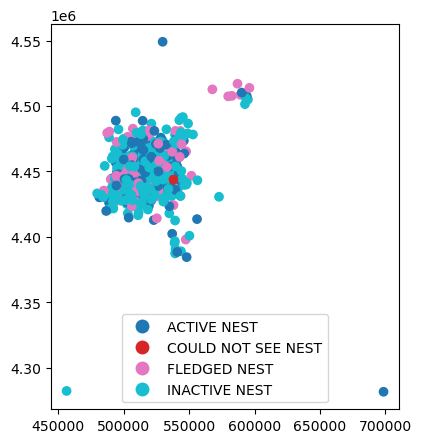

In [18]:

fig, ax = plt.subplots(figsize =(5, 5))
raptors_utm.plot(ax = ax, column="recentstat", legend=True)
plt.show()

But with GeoPandas it is very easy to convert to a different coordinate reference system using the GeoDataFrames to_crs method

In [19]:
raptors_utm2 = raptors.to_crs(epsg=26913)

In [20]:
raptors_utm2.crs

<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

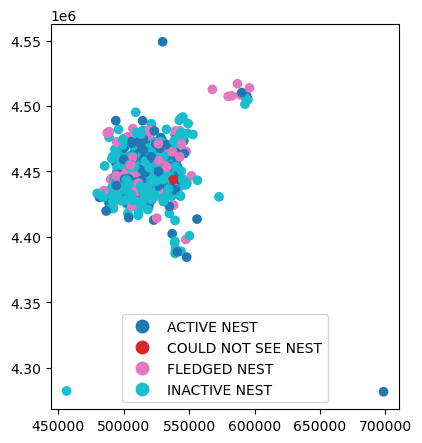

In [21]:
fig, ax = plt.subplots(figsize= (5,5))
raptors_utm2.plot( ax = ax, column="recentstat", legend=True, figsize=(10, 10))
plt.show()

### Reading data from a GeoJSON file

Not really different than reading data from a shapefile

In [22]:
raptors_jsn = gpd.read_file("data/wildlife_raptor.geojson")

In [23]:
raptors_jsn.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

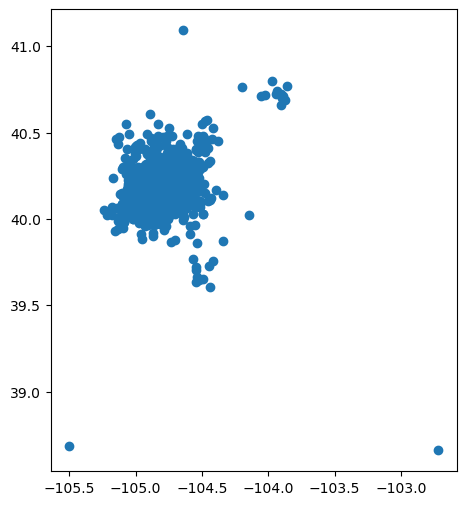

In [24]:
fig, ax = plt.subplots(figsize= (6, 6))
raptors_jsn.plot(ax = ax)
plt.show()

In [25]:
raptors_jsn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   postgis_fid    876 non-null    int64   
 1   lat_y_dd       876 non-null    float64 
 2   long_x_dd      876 non-null    float64 
 3   lastsurvey     876 non-null    object  
 4   recentspecies  876 non-null    object  
 5   recentstatus   876 non-null    object  
 6   Nest_ID        876 non-null    int64   
 7   geometry       876 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 54.9+ KB


By now you may be thinking looks great for points but what about polygons?

In [26]:
buowl = gpd.read_file("data/wildlife_buowl.geojson")

In [27]:
buowl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
buowl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   postgis_fid   473 non-null    int64   
 1   habitat       473 non-null    object  
 2   hist_occup    473 non-null    object  
 3   recentstatus  473 non-null    object  
 4   habitat_id    473 non-null    int64   
 5   geometry      473 non-null    geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 22.3+ KB


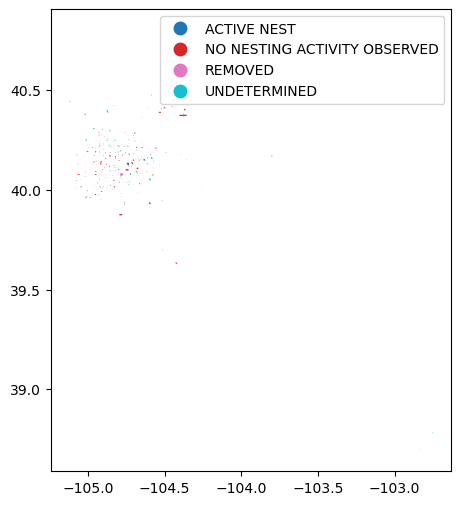

In [31]:
fig, ax = plt.subplots(figsize = (6,6))
buowl.plot(column="recentstatus", legend=True, ax = ax)
plt.show()

In [32]:
buowl

,postgis_fid,habitat,hist_occup,recentstatus,habitat_id,geometry
0,15,Ground squirrel-mixed Vegetation,Undetermined,NO NESTING ACTIVITY OBSERVED,15,"MULTIPOLYGON (((-104.61687 40.16775, -104.6167..."
1,41,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,41,"MULTIPOLYGON (((-104.65030 40.14220, -104.6501..."
2,42,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,42,"MULTIPOLYGON (((-104.59917 40.11202, -104.5990..."
3,43,Ground squirrel-mixed Vegetation; removed 3/26/14,Undetermined,REMOVED,43,"MULTIPOLYGON (((-104.69383 40.17870, -104.6936..."
4,54,Active Prarie Dog Colony,Undetermined,NO NESTING ACTIVITY OBSERVED,54,"MULTIPOLYGON (((-104.68393 40.19921, -104.6840..."
...,...,...,...,...,...,...
468,447,Active Prairie Dog Colony,Yes,ACTIVE NEST,447,"MULTIPOLYGON (((-104.40336 40.46377, -104.4042..."
469,449,Active Prairie Dog Colony,Yes,ACTIVE NEST,449,"MULTIPOLYGON (((-104.38712 40.47787, -104.3871..."
470,461,Active Prairie Dog Colony,Yes,ACTIVE NEST,461,"MULTIPOLYGON (((-104.39052 40.40576, -104.3910..."
471,486,sdafdfadfa,Yes,ACTIVE NEST,486,"MULTIPOLYGON (((-105.08032 40.01568, -105.0817..."


## Reading layers from a multi-layer file

Not fundamentally different from a single layer file, you just need to specify the name of the layer

### Reading data from a geopackage

In [33]:
eagles = gpd.read_file("data/DJBasin.gpkg")

In [34]:
eagles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  1109 non-null   int64   
 1   type        1109 non-null   object  
 2   row_width   1109 non-null   float64 
 3   Project     1109 non-null   int64   
 4   geometry    1109 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 43.4+ KB


Will read the first layer in the geopackage.

But what if you want to read a specific layer?
What if you don't know what layers are contained in the layer?

In [35]:
import fiona
fiona.listlayers("data/DJBasin.gpkg")

['LinearProjects',
 'BUOWL_Habitat',
 'BAEA_Nests',
 'Raptor_nests',
 'GBH_rookeries',
 'new_poly',
 'buowl_ho',
 'buowl_ho2']

In [37]:
eagles = gpd.read_file("data/DJBasin.gpkg", layer = "BAEA_Nests")

In [38]:
eagles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   postgis_fi  70 non-null     int64   
 1   lat_y_dd    70 non-null     float64 
 2   long_x_dd   70 non-null     float64 
 3   status      70 non-null     object  
 4   nest_id     70 non-null     int64   
 5   geometry    70 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(1)
memory usage: 3.4+ KB


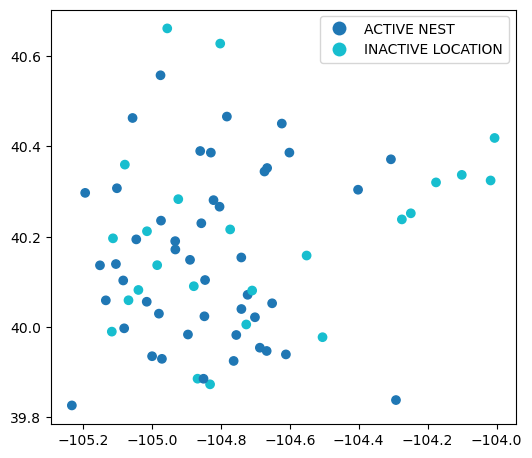

In [41]:
fig,ax = plt.subplots(figsize = (6,6))
eagles.plot(ax=ax, column="status", legend=True)
plt.show()

If you want, you can read all of the layers at once into a dictionary that has the layer name as the key

In [43]:
data_lyr = fiona.listlayers("data/DJBasin.gpkg") #layers
 
layers = {}
for lyr in data_lyr:
    all_layers =  gpd.read_file("data/DJBasin.gpkg", layer = lyr)
    layers[lyr] = all_layers
#-----------------
#layers = {} # create an empty dictionary named layers
#for lyr in fiona.listlayers("data/DJBasin.gpkg"): # loop through the layers in the file
    # add a new entry to the layers dictionary with the layer name as the key and the GeoDataFrame as the value
 #   layers[lyr] = gpd.read_file("data/DJBasin.gpkg", layer = lyr) 

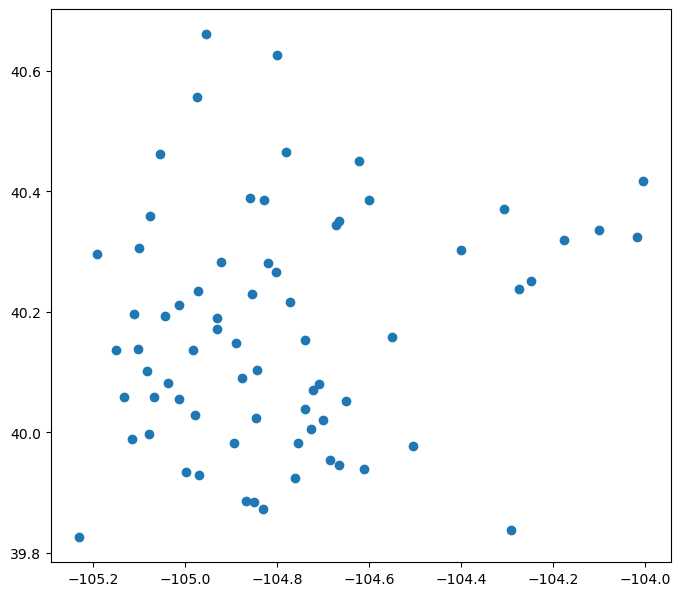

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
layers["BAEA_Nests"].plot(ax=ax)
plt.show()

### Read data from a file geodatabase

First lets list the layers in the database

In [48]:
fiona.listlayers("data/DJBasin.gdb")

['Burrowing_Owl_Habitat',
 'Bald_Eagle_Nests',
 'Raptor_Nests',
 'Heron_Rookeries',
 'Linear_Projects']

Now we can read the layers just like we read the geopackage layer

In [49]:
gbh = gpd.read_file("data/DJBasin.gdb", layer = "Heron_Rookeries")

In [50]:
gbh.crs

<Projected CRS: EPSG:26913>
Name: NAD83 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 108°W and 102°W - onshore and offshore. Canada - Northwest Territories; Nunavut; Saskatchewan. United States (USA) - Colorado; Montana; Nebraska; New Mexico; North Dakota; Oklahoma; South Dakota; Texas; Wyoming.
- bounds: (-108.0, 28.98, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [51]:
gbh.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   postgis_fi    55 non-null     int64   
 1   species       55 non-null     object  
 2   activity      55 non-null     object  
 3   Shape_Length  55 non-null     float64 
 4   Shape_Area    55 non-null     float64 
 5   geometry      55 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 2.7+ KB


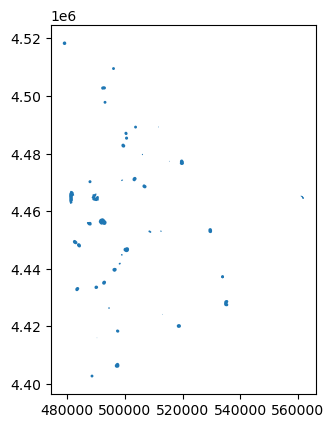

In [52]:
fig, ax = plt.subplots()
gbh.plot(figsize=(10,10), ax=ax)
plt.show()

In [55]:
%whos


Variable       Type            Data/Info
----------------------------------------
all_layers     GeoDataFrame         postgis_fi          <...>n\n[110 rows x 7 columns]
ax             Axes            Axes(0.305372,0.11;0.414256x0.77)
buowl          GeoDataFrame         postgis_fid         <...>n\n[473 rows x 6 columns]
data_lyr       list            n=8
eagles         GeoDataFrame        postgis_fi   lat_y_dd<...>\n\n[70 rows x 6 columns]
fig            Figure          Figure(640x480)
fiona          module          <module 'fiona' from '/op<...>kages/fiona/__init__.py'>
gbh            GeoDataFrame        postgis_fi           <...> 4426654.876, 494518...  
gpd            module          <module 'geopandas' from <...>s/geopandas/__init__.py'>
layers         dict            n=8
lyr            str             buowl_ho2
plt            module          <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
psycopg2       module          <module 'psycopg2' from '<...>es/psycopg2/__init__.py'>

In [57]:
%who_ls

['all_layers',
 'ax',
 'buowl',
 'data_lyr',
 'eagles',
 'fig',
 'fiona',
 'gbh',
 'gpd',
 'layers',
 'lyr',
 'plt',
 'psycopg2',
 'raptors',
 'raptors_jsn',
 'raptors_utm',
 'raptors_utm2']

## Read data from a PostGIS database

To me this is the ultimate combination. Besides the fact that PostGIS will provide the best performance and most features of any storage format, if you know basic Spatial SQL you can do a lot of data manipulation on the fly using SQL b efore the data even comes into GeoPandas and thus you can save yourself a lot of steps when it comes to cleaning data.

Reading data from a PostGIS database requires a database connection object that is easily created with the psycopg modules that we installed along with GeoPandas.

First we import psycopg2

In [53]:
import psycopg2

Next we create a database connection object

In [54]:
try:
    conn = psycopg2.connect("dbname='korimage_enterprise' user='korimage_reader' host='www.korimageo.com' password='reader'")
except:
    print("I am unable to connect to the database")

I am unable to connect to the database


Finally we submit a SQL query to the database using the GeoPandas read_postgis method

In [ ]:
eagles = gpd.read_postgis("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70 AND status = 'ACTIVE NEST'", conn)

In [ ]:
eagles.info()

In [ ]:
eagles.plot()

In [ ]:
import pandas as pd
eagle_table = pd.read_sql_query("SELECT gid, lat_y_dd AS latitude, long_x_dd AS longitude, status, nest_id, geom FROM dj_eagle WHERE gid <=70", conn)

In [ ]:
eagle_table.plot()

In [ ]:
%who_ls GeoDataFrame